In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

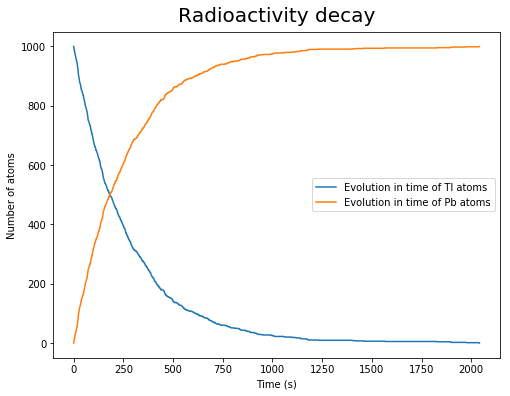

In [23]:
tau = 3.052*60 # Seconds

atoms_Tl = 1000
atoms_Pb = 0

def prob(t):
    return 1-2**(-t/tau)

# Compute the evolution in time of the atoms 
time = 0
time_sample = 1
evol_Tl = np.array([atoms_Tl])
evol_Pb = np.array([0])
prob_decay = prob(time_sample)
while atoms_Tl > 0:
    for i in range(atoms_Tl):
        if np.random.uniform(0,1) <= prob_decay:
            atoms_Tl = atoms_Tl-1
            atoms_Pb = atoms_Pb+1
    evol_Tl = np.append(evol_Tl, atoms_Tl)
    evol_Pb = np.append(evol_Pb, atoms_Pb)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(evol_Tl, label='Evolution in time of Tl atoms')
ax.plot(evol_Pb, label='Evolution in time of Pb atoms')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Number of atoms")
ax.set_title("Radioactivity decay", fontsize=20, verticalalignment='bottom')
ax.legend()

To solve the second part of the exercise, we have to do some math before. We know that the probability density function $p(t)=\mu e^{-\mu t }$ has quantile function $t(z) = - \frac{1}{\mu}\log(1-z)$. 
In our case to match the function $p(t)=\frac{\ln 2}{\tau}2^{-t/\tau}$ with the prevoius one, we must have $\mu=\frac{\ln 2}{\tau}$. In fact:
$$p(t)=\frac{\ln 2}{\tau}2^{-t/\tau}=\mu 2^{\frac{-t \ln(2)}{\tau \ln(2)}}=\mu 2^{\frac{-t \mu}{ \ln(2)}}=\mu e^{-t \mu}$$
where we used the fact that:
$$2^{\frac{1}{\ln(2)}}=e$$
Now we can proceed with the exercise.

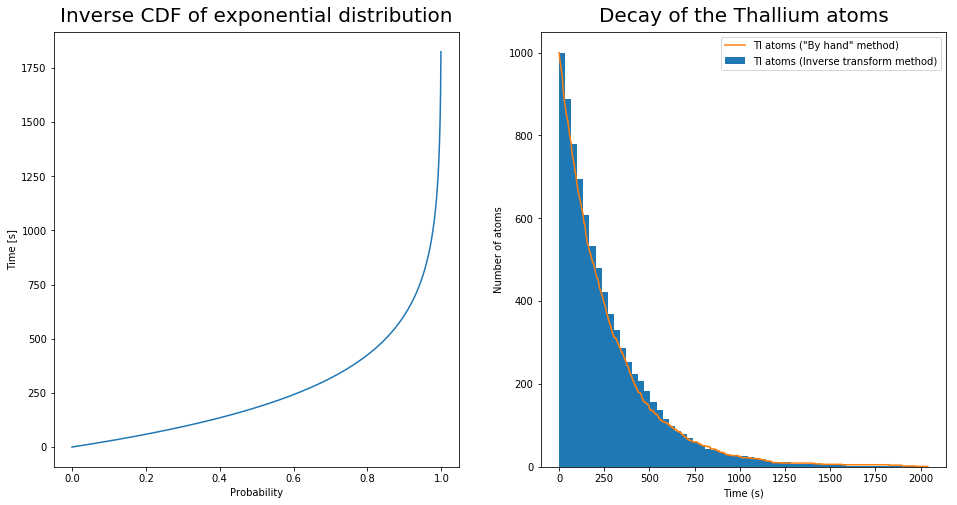

In [53]:
# Total number of atoms
atoms_Tl = 1000
mu = np.log(2)/tau # Previous result

# Compute the evolution in time of the atoms with the inverse cdf
def expon_icdf(p, mu=1):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1-p)/mu

# Draw 1000 numbers from uniform distribution probability
decay_time = expon_icdf(np.random.random(atoms_Tl), mu = mu)
# Plot the result
fig = plt.figure(figsize=(16, 8))
ay = fig.add_subplot(1,2,1)
ax = fig.add_subplot(1,2,2)

# Comulative = -1 to reverse the order
# Change bins to increase/decrease the resolution
prob = np.linspace(0,1,1000,endpoint=False)
ay.plot(prob,expon_icdf(prob,mu=mu))
ay.set_xlabel("Probability")
ay.set_ylabel("Time [s]")
ay.set_title("Inverse CDF of exponential distribution", fontsize=20, verticalalignment='bottom')

ax.hist(decay_time, bins=60, cumulative=-1, label='Tl atoms (Inverse transform method)')
ax.plot(evol_Tl, label='Tl atoms ("By hand" method)')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Number of atoms")
ax.set_title("Decay of the Thallium atoms", fontsize=20, verticalalignment='bottom')
ax.legend()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [66]:
# Constants
N = 10**6
elementary_charge = 1.61*10**(-19)
epsilon = 8.89*10**(-12)
a0 = 5.29*10**(-11)
E = 7.7*10**6*elementary_charge
Z = 79

# Extract numbers from uniform probability
z = np.random.random(N)
# We use the Box-Muller method
b = np.sqrt(-2*(a0/100)**(2)*np.log(1-z))

constant_part = Z*elementary_charge**2/(2*np.pi*epsilon*E)
theta = 2*np.arctan(constant_part/b)

# We want the fraction of particels with angles > 90 degrees
fraction = len(theta[theta > np.pi/2])/N
print("The fraction of particles that 'bounce back' is:",fraction)

The fraction of particles that 'bounce back' is: 0.001582


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

Integral value with hit/miss method: 1.45694 with error: 0.005539999999999878
Integral value with mean value method: 1.4545583320401798 with error: 0.00315833204017979


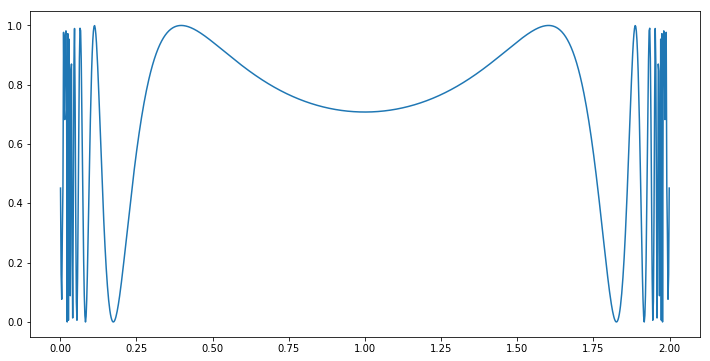

In [87]:
# Function to integrate
def func(x):
    return np.sin(1/(x*(2-x)))**2

x = np.linspace(0.001,1.999,1000)
plt.figure(figsize=(12,6))
plt.plot(x, func(x))

# Monte Carlo Integration with Hit/Miss method
N = 10**5 # Number of sample
count = 0
for i in range(N):
    # Extract number from uniform distribution in the interval 0-2
    random_x = 2*np.random.random()
    # Extract number for the value of the function in x
    random_y = np.random.random()
    if random_y < func(random_x):
        count += 1

# Compute the final value of the integral
correct_result = 1.4514
A = 2*1 # Total Area
I = count*A/N
print("Integral value with hit/miss method:",I,"with error:",abs(I-correct_result)) 

# Monte Carlo Integration with the mean value method
# Extract N random points inside the interval
random_points = 2*np.random.random(N) 
# Estimate the mean value of the function
mean_f = np.sum(func(random_points))/N
# Compute the integral
I = 2*mean_f
print("Integral value with mean value method:",I,"with error:",abs(I-correct_result)) 

The results from the two methods are very similar and the errors are almost equal.

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function (Monte Carlo integration and also with the Monte Carlo average method)

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere (with mean method)



In [122]:
# 2-D circle
def circle(x,y):
    if x**2 + y**2 < 1:
        return 1
    else:
        return 0

# N-D circle
def n_circle(r):
    if r <= 1:
        return 1
    else:
        return 0
        
vec_circle = np.vectorize(circle)
vec_n_circle = np.vectorize(n_circle)

# Compute the area of the circle with Monte Carlo integration: mean value method
N = 10**6
count = 0

# We want to drawn number in the interval [-1,1]
random_x = 2*np.random.random(N)-1 
random_y = 2*np.random.random(N)-1
    
# We drawn value inside the square with side = 2
V = 2*2 # Volume
I = V/N*np.sum(vec_circle(random_x,random_y))
correct_result = np.pi
print('Result with mean value method of circle area:',I,'with error:',abs(I-correct_result))

# Generalization of the method with mean value
dim = 10 # Dimension of the unit sphere
random_x = 2*np.random.random((N,dim))-1
V = 2**dim # Volume
r_squared = np.sum(random_x**2,axis=1)
I = V/N*np.sum(vec_n_circle(r_squared))
correct_result = np.pi**5/(120) # From Wikipedia: pi^(dim/2)/dim!
print('Result with mean value method of',dim,'D sphere:',I,'with error:',abs(I-correct_result))

Result with mean value method of circle area: 3.140164 with error: 0.0014286535897931607
Result with mean value method of 10 D sphere: 2.5856 with error: 0.03543596012265482


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84 (study also the uncertainty).

In [124]:
N = 10**6 # Number of samples
correct_result = 0.838933 # Result from Wolfram Alpha

def func(x):
    return x**(-1/2)/(np.exp(x)+1)

def weight(x):
    return x**(-1/2)

# Value of the integral of the function of weights (computed by hand)
W = 2 
x = np.random.random(N)
I = 1/N*np.sum(func(x)/weight(x))*W

print('Result with importance sampling method:',I, 'with error:',np.abs(I-correct_result))

Result with importance sampling method: 0.7598494613815818 with error: 0.07908353861841821
